In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import sklearn.datasets
import sklearn.linear_model

In [2]:
def load_planar_dataset():
    np.random.seed(1)
    m = 400 # number of examples
    N = int(m/2) # number of points per class
    D = 2 # dimensionality
    X = np.zeros((m,D)) # data matrix where each row is a single example
    Y = np.zeros((m,1), dtype='uint8') # labels vector (0 for red, 1 for blue)
    a = 4 # maximum ray of the flower

    for j in range(2):
        ix = range(N*j,N*(j+1))
        t = np.linspace(j*3.12,(j+1)*3.12,N) + np.random.randn(N)*0.2 # theta
        r = a*np.sin(4*t) + np.random.randn(N)*0.2 # radius
        X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
        Y[ix] = j

    return X, Y

In [3]:
x, y = load_planar_dataset()

In [4]:
import pandas as pd

In [5]:
x_df = pd.DataFrame(x, columns=['x1','x2'])

In [6]:
x_df

,x1,x2
0,1.204442,3.576114
1,0.158710,-1.482171
2,0.095247,-1.279955
3,0.349178,-2.064380
4,0.694150,2.889109
...,...,...
395,0.450368,2.408121
396,0.037573,0.891601
397,0.213641,1.732016
398,0.324387,-2.116325


In [7]:
y_df = pd.Series(y.tolist()).to_frame()
df = pd.concat([x_df,y_df],axis=1)
df.rename(columns={df.columns[-1]:'class'}, inplace=True)
df

,x1,x2,class
0,1.204442,3.576114,[0]
1,0.158710,-1.482171,[0]
2,0.095247,-1.279955,[0]
3,0.349178,-2.064380,[0]
4,0.694150,2.889109,[0]
...,...,...,...
395,0.450368,2.408121,[1]
396,0.037573,0.891601,[1]
397,0.213641,1.732016,[1]
398,0.324387,-2.116325,[1]


In [8]:
df = df.explode('class')
df

,x1,x2,class
0,1.204442,3.576114,0
1,0.158710,-1.482171,0
2,0.095247,-1.279955,0
3,0.349178,-2.064380,0
4,0.694150,2.889109,0
...,...,...,...
395,0.450368,2.408121,1
396,0.037573,0.891601,1
397,0.213641,1.732016,1
398,0.324387,-2.116325,1


In [9]:
import seaborn as sns

<AxesSubplot:xlabel='x1', ylabel='x2'>

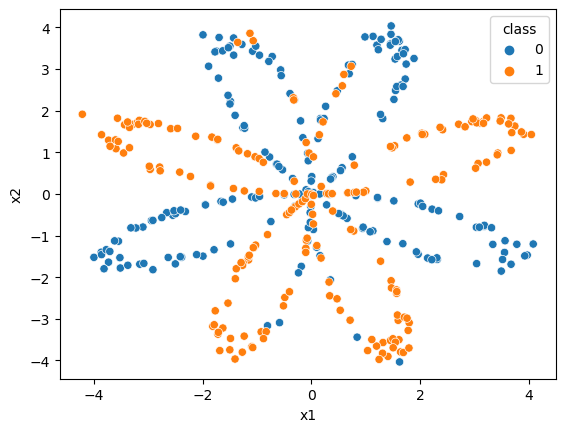

In [10]:
sns.scatterplot(x='x1',y='x2', hue='class', data=df)

In [11]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x,y.ravel())

LogisticRegression()

In [12]:
predictions= model.predict(x)

In [13]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(predictions, y)
acc

0.47

In [14]:
# Set min and max values and give it some padding.
x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1

In [15]:
h = 0.01
# Generate a grid of points with distance h between them
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

In [16]:
# Predict the function value for the whole grid
z= model.predict(np.c_[xx.ravel(), yy.ravel()])

In [17]:
z = z.reshape(yy.shape) # xx also works for they're of the same shape

<AxesSubplot:xlabel='x1', ylabel='x2'>

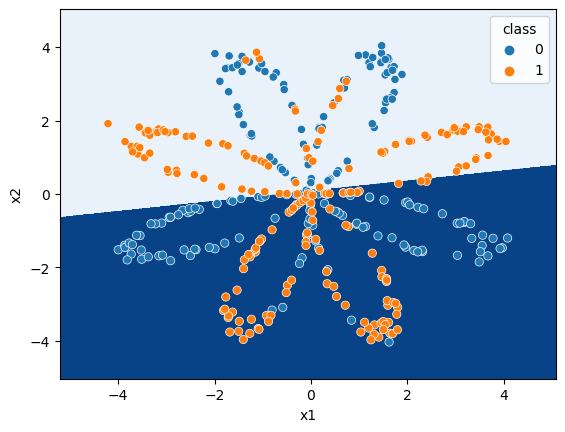

In [18]:
# Plot the contour and training examples
plt.contourf(xx, yy, z, cmap='Blues')
plt.ylabel('x2')
plt.xlabel('x1')
sns.scatterplot(x='x1',y='x2', hue='class', data=df)

In [19]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

2023-01-20 13:52:36.303798: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-20 13:52:36.464448: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-01-20 13:52:36.464464: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-01-20 13:52:37.036443: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

In [20]:
x.shape

(400, 2)

In [21]:
model = Sequential([
                    tf.keras.Input(shape=(2,)),
                    Dense(units=4, activation='tanh'),
                    Dense(units=1, activation='sigmoid')
                    ],
                    name='my_model'
                    )

2023-01-20 13:52:37.818968: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-01-20 13:52:37.818986: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-01-20 13:52:37.819006: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (hashem-Latitude-E6540): /proc/driver/nvidia/version does not exist
2023-01-20 13:52:37.819186: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [22]:
model.summary()

Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 12        
                                                                 
 dense_1 (Dense)             (None, 1)                 5         
                                                                 
Total params: 17
Trainable params: 17
Non-trainable params: 0
_________________________________________________________________


In [23]:
[layer1, layer2] = model.layers

In [24]:
w1,b1 = layer1.get_weights()
w2,b2 = layer2.get_weights()

print(f'W1 shape = {w1.shape}, b1 shape = {b1.shape}') 
print(f'W1 shape = {w2.shape}, b1 shape = {b2.shape}') 

W1 shape = (2, 4), b1 shape = (4,)
W1 shape = (4, 1), b1 shape = (1,)


In [25]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(0.15)
             )

In [26]:
model.fit(x,y,epochs=100)

Epoch 1/100
13/13 [==============================] - 0s 2ms/step - loss: 0.6038
Epoch 2/100
13/13 [==============================] - 0s 2ms/step - loss: 0.4624
Epoch 3/100
13/13 [==============================] - 0s 1ms/step - loss: 0.3856
Epoch 4/100
13/13 [==============================] - 0s 2ms/step - loss: 0.3701
Epoch 5/100
13/13 [==============================] - 0s 2ms/step - loss: 0.3566
Epoch 6/100
13/13 [==============================] - 0s 2ms/step - loss: 0.3472
Epoch 7/100
13/13 [==============================] - 0s 1ms/step - loss: 0.3375
Epoch 8/100
13/13 [==============================] - 0s 2ms/step - loss: 0.3415
Epoch 9/100
13/13 [==============================] - 0s 1ms/step - loss: 0.3389
Epoch 10/100
13/13 [==============================] - 0s 2ms/step - loss: 0.3169
Epoch 11/100
13/13 [==============================] - 0s 2ms/step - loss: 0.3159
Epoch 12/100
13/13 [==============================] - 0s 1ms/step - loss: 0.3256
Epoch 13/100
13/13 [=================

In [27]:
predictionstemp = model.predict(x)
predictions = []

for prediction in predictionstemp:
    if prediction >= 0.5:
        predictions.append(1)
    else:
        predictions.append(0)

predictions

13/13 [==============================] - 0s 964us/step


[0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [28]:
acc = accuracy_score(predictions,y)

In [29]:
acc

0.9025

32445/32445 [==============================] - 26s 805us/step


<AxesSubplot:xlabel='x1', ylabel='x2'>

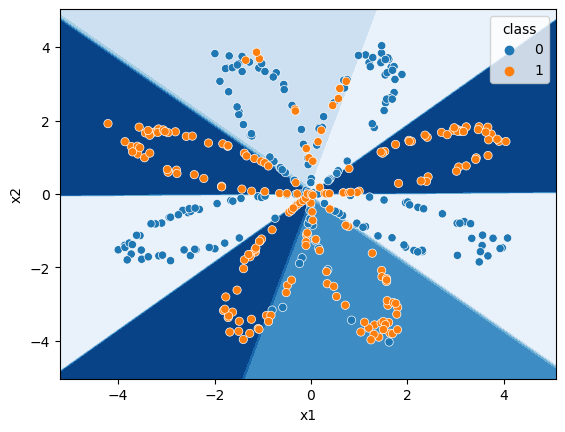

In [30]:
# Set min and max values and give it some padding.
x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
h = 0.01
# Generate a grid of points with distance h between them
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
# Predict the function value for the whole grid
z= model.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(yy.shape) # xx also works for they're of the same shape
# Plot the contour and training examples
plt.contourf(xx, yy, z, cmap='Blues')
plt.ylabel('x2')
plt.xlabel('x1')
sns.scatterplot(x='x1',y='x2', hue='class', data=df)